Classification algorithms are used for predictive modeling problem where input training data is used to predict the probability that future data will fall into one of the predetermined/labelled categories.

one of the most popular classification algorithms are —

1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Decision Tree
5. Support Vector Machines

To understand classification in detail the best way is to learn ( a bit) of theory and implement a project. In this post we are going to build a project. The data for this project can be found in the link below —

In [2]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib import colormaps as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
import ydata_profiling as pp
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
import matplotlib.colors
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  f1_score
import pandas as pd
import numpy as np
cmap2 = cm.get_cmap('twilight')
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

c:\App\python\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning:

numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.

c:\App\python\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



In [3]:
df= pd.read_csv('./ML-Classification-Project/Data.csv',low_memory=False)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Get to know your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# Shape of Data
df.shape

(8124, 23)

In [6]:
#Missing Values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Unique Values : (classes: edible=e, poisonous=p)
df['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

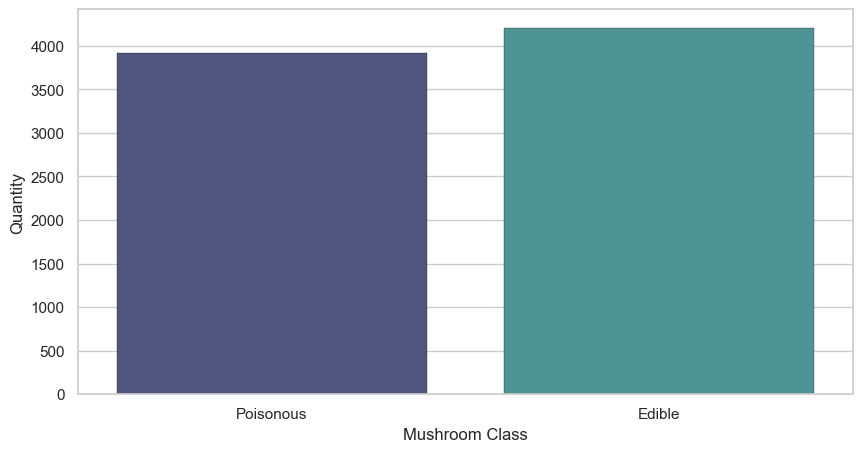

In [9]:
# Mushroom Class
m_class = ('Poisonous', 'Edible')
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='class', palette='mako', saturation=0.6, data=df,edgecolor='black',linewidth=0.2, dodge=True,ax=ax)
ax.set_xticklabels(m_class)
plt.xlabel('Mushroom Class')
plt.ylabel('Quantity')
plt.show()

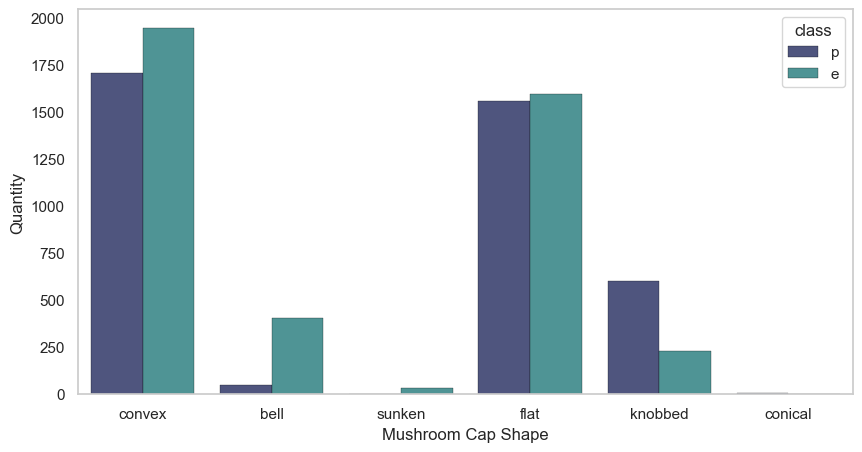

In [10]:
# Mushroom Shape
m_shape = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='cap-shape', palette='mako',hue='class', saturation=0.6, data=df,edgecolor='black',linewidth=0.2, dodge=True,ax=ax)
ax.set_xticklabels(labels)
plt.xlabel('Mushroom Cap Shape')
plt.ylabel('Quantity')
plt.grid(False)

plt.show()

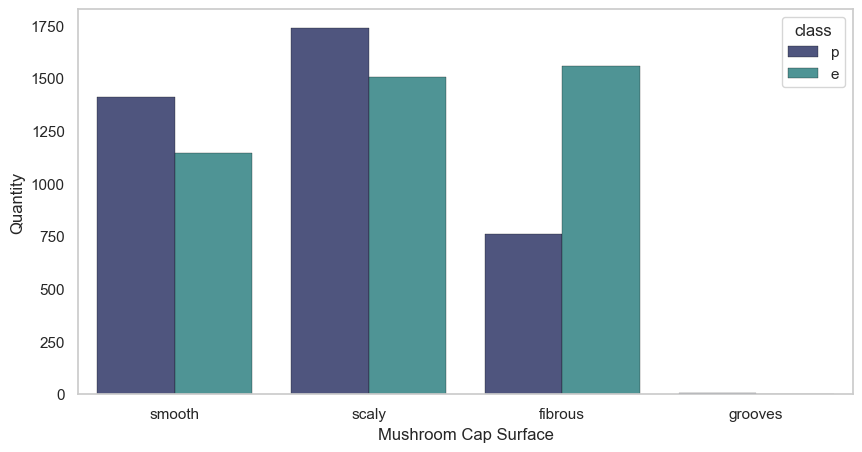

In [11]:
# Musrhroom Cap Surface
m_surface = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='cap-surface', palette='mako',hue='class', saturation=0.6, data=df,edgecolor='black',linewidth=0.2, dodge=True,ax=ax)
ax.set_xticklabels(m_surface)
plt.xlabel('Mushroom Cap Surface')
plt.ylabel('Quantity')
plt.grid(False)
plt.show()

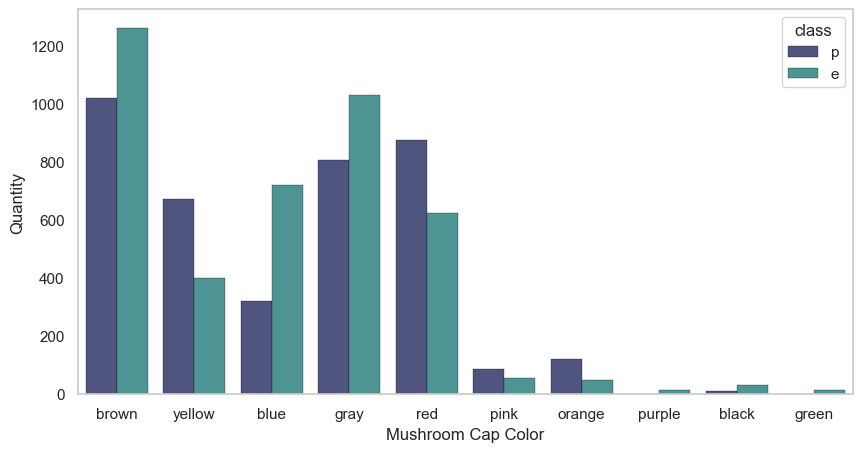

In [12]:
# Mushroom Cap Color
m_color = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='cap-color', palette='mako',hue='class', saturation=0.6, data=df,edgecolor='black',linewidth=0.2, dodge=True,ax=ax)
ax.set_xticklabels(m_color)
plt.xlabel('Mushroom Cap Color')
plt.ylabel('Quantity')
plt.grid(False)

plt.show()

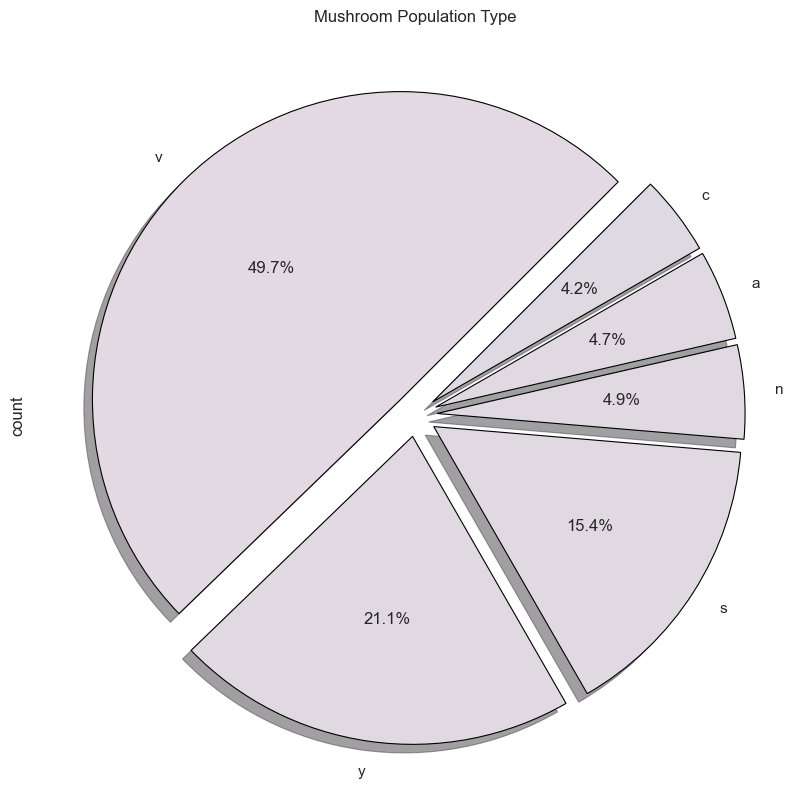

In [13]:
# Mushroom Population 
##{"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
f, ax = plt.subplots(figsize=(15, 10))
df['population'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True, ax=ax,colors=colors1, startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'},explode=[0.07 for i in df['population'].value_counts().index ])
ax.set_title('Mushroom Population Type')

plt.show()

Text(0.5, 1.0, 'Mushroom Habitat Type')

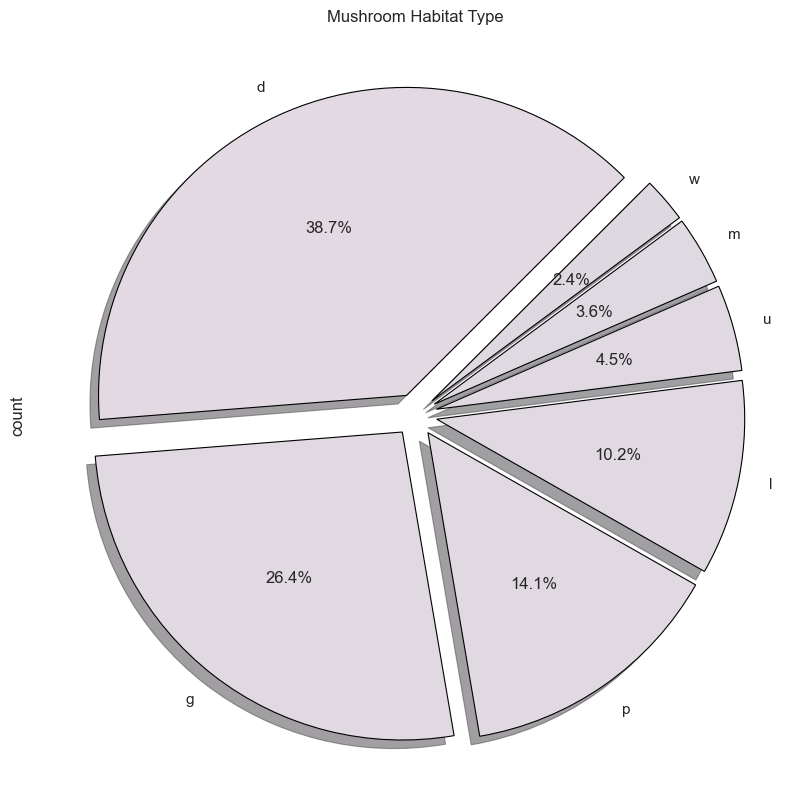

In [14]:
# Mushroom Habitat
#{"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}
f, ax = plt.subplots(figsize=(15, 10))
df['habitat'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True, ax=ax,colors=colors1, startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'},explode=[0.07 for i in df['habitat'].value_counts().index ])

ax.set_title('Mushroom Habitat Type')

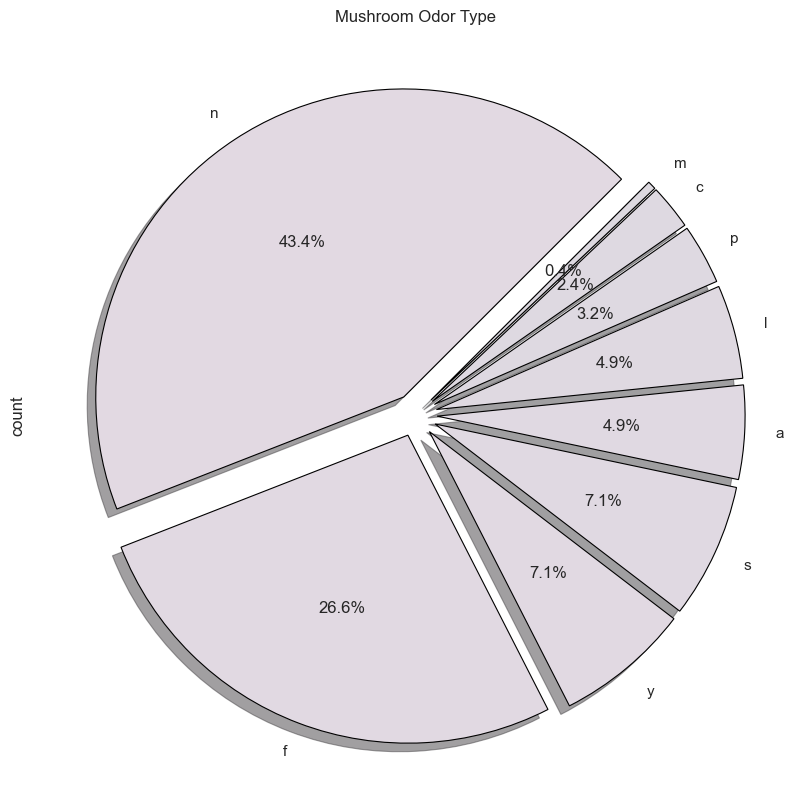

In [15]:
# Mushroom odor
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=no odor,pungent=p,spicy=s
f, ax = plt.subplots(figsize=(15, 10))
df['odor'].value_counts().plot.pie( autopct='%1.1f%%', shadow=True, ax=ax,colors=colors1, startangle=45,wedgeprops={'linewidth':0.8,'edgecolor':'black'},explode=[0.07 for i in df['odor'].value_counts().index ])
ax.set_title('Mushroom Odor Type')

plt.show()

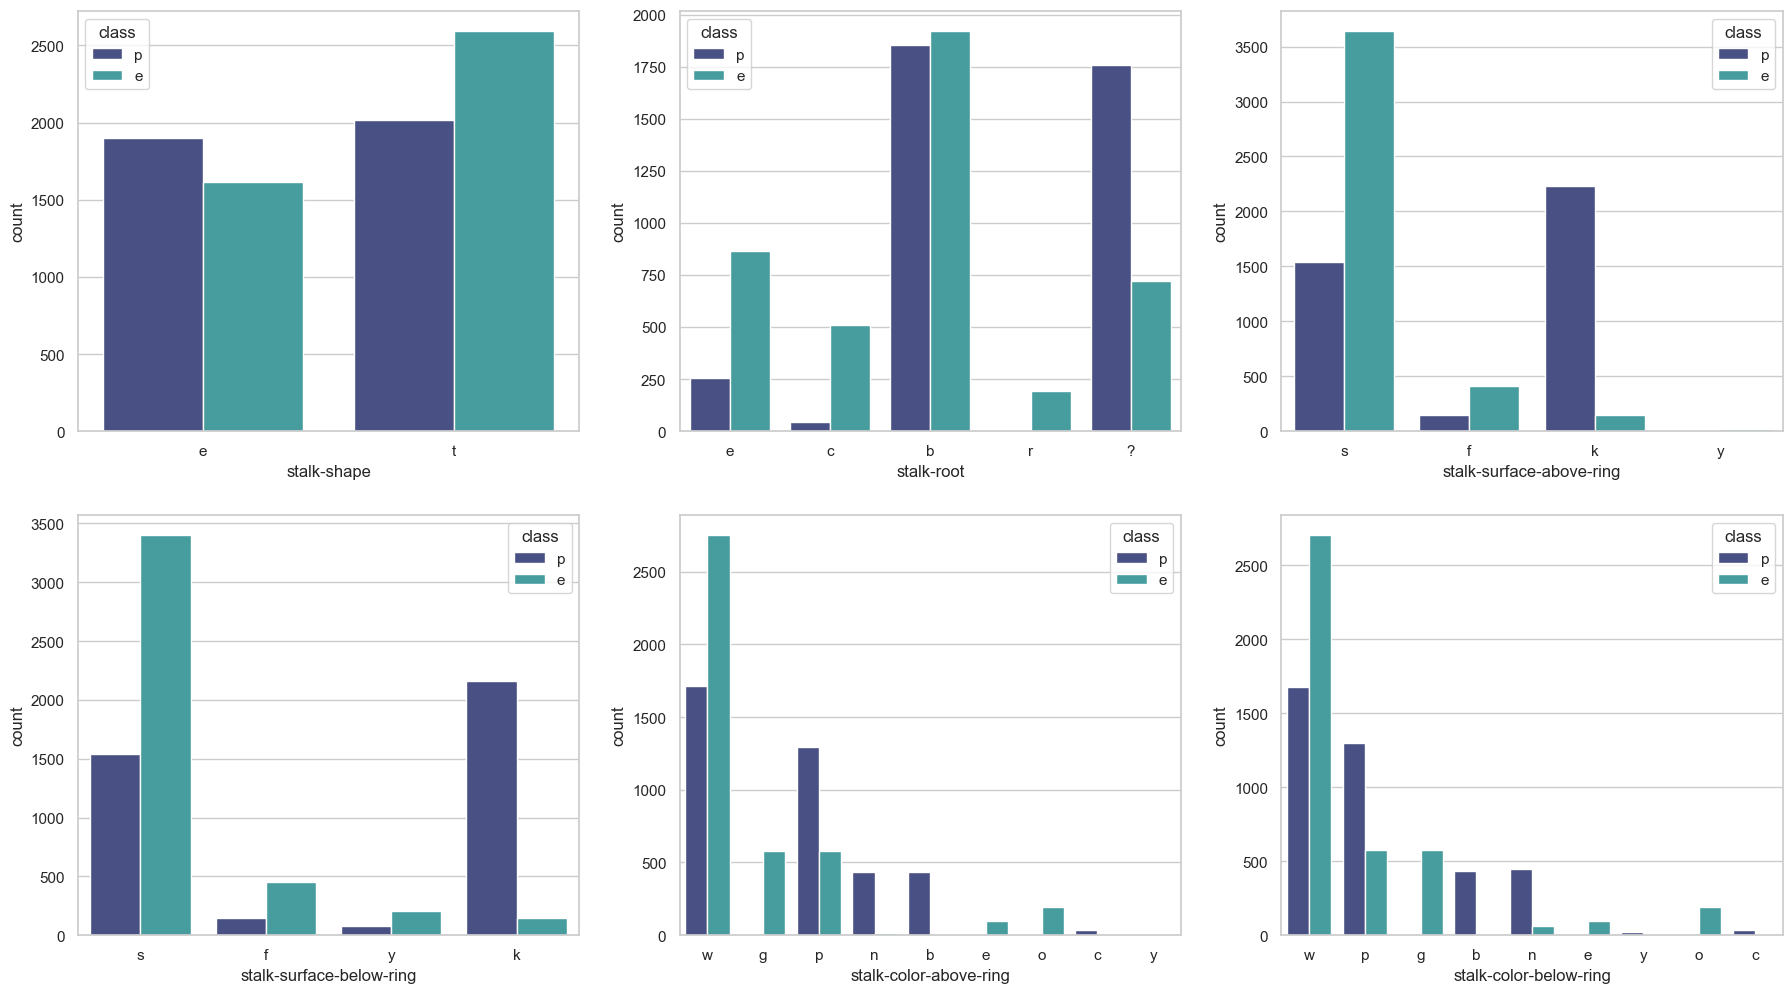

In [16]:
# Mushroom Stalk Analysis
fig, ax = plt.subplots(2,3, figsize=(22,12))
sns.countplot(x="stalk-shape", hue='class', data=df, ax=ax[0,0],palette='mako')
sns.countplot(x="stalk-root", hue='class', data=df, ax=ax[0,1],palette='mako')
sns.countplot(x="stalk-surface-above-ring", hue='class', data=df, ax=ax[0,2],palette='mako')
sns.countplot(x="stalk-surface-below-ring", hue='class', data=df, ax=ax[1,0],palette='mako')
sns.countplot(x="stalk-color-above-ring", hue='class', data=df, ax=ax[1,1],palette='mako')
sns.countplot(x="stalk-color-below-ring", hue='class', data=df, ax=ax[1,2],palette='mako')
plt.show()

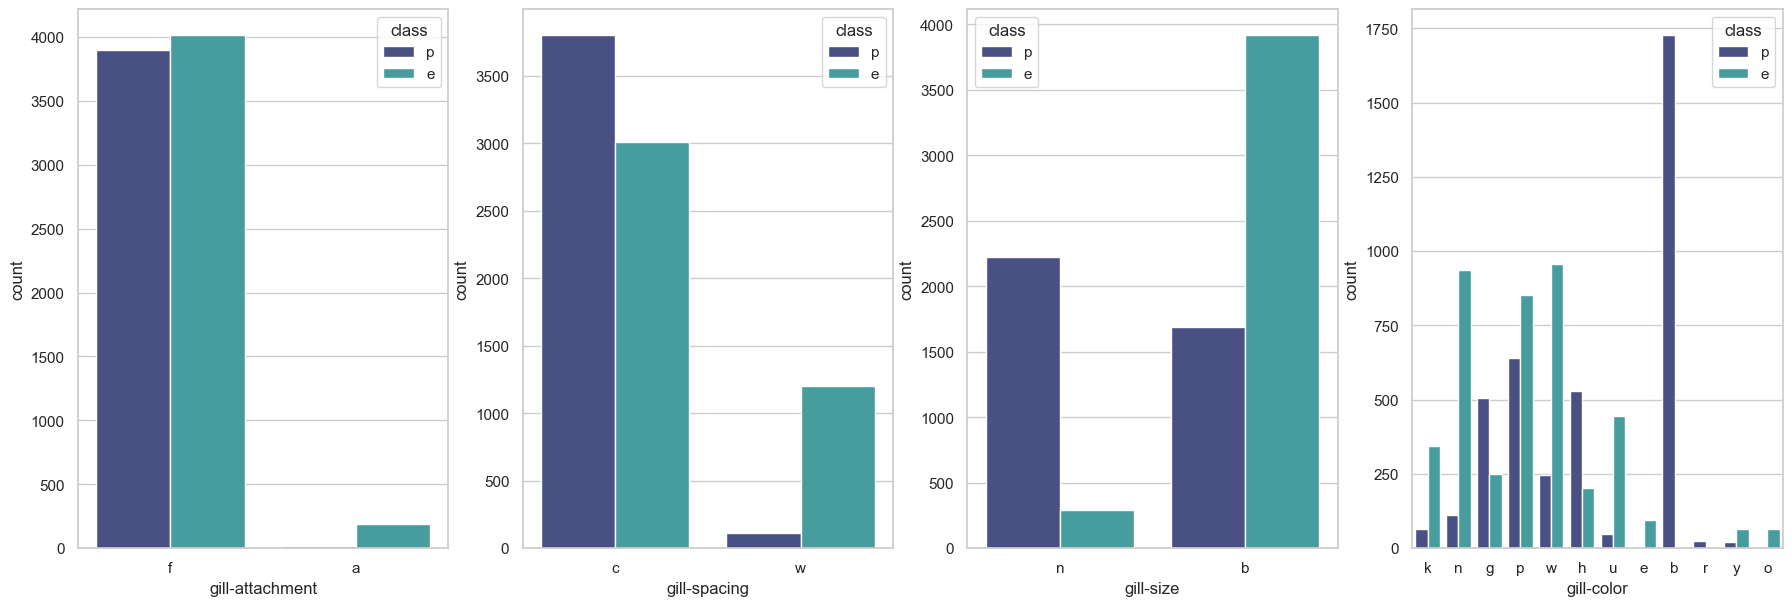

In [17]:
# Mushroom Gill Attachment
fig, ax = plt.subplots(1,4, figsize=(22,7))
sns.countplot(x="gill-attachment", hue='class', data=df, ax=ax[0],palette='mako')
sns.countplot(x="gill-spacing", hue='class', data=df, ax=ax[1],palette='mako')
sns.countplot(x="gill-size", hue='class', data=df, ax=ax[2],palette='mako')
sns.countplot(x="gill-color", hue='class', data=df, ax=ax[3],palette='mako')

plt.show()

In [18]:
# Features and Labels and Label Encoding the categorical Variables : # p(poisonous)->1 and e(Edible)->0
X=df.iloc[:, 1:23]
y=df.iloc[:,0]
l = LabelEncoder()
y = l.fit_transform(y)
X=pd.get_dummies(X)

In [19]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=42)

In [20]:
# Decision Tree Classifier
c = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
c.fit(X_train, y_train)
y_pred=c.predict(X_test)
print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))
print("F1-score", f1_score(y_test, y_pred))

Accuracy Score: 1.0
F1-score 1.0


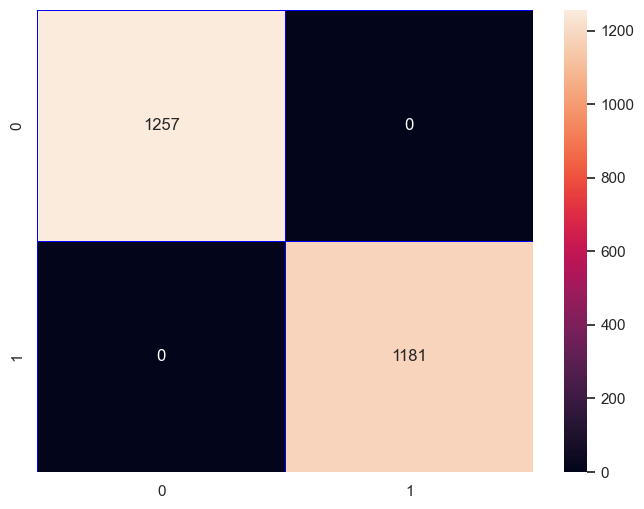

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="blue", fmt= '.0f',ax=ax,cmap='rocket')

plt.show()

In [22]:
# SVM Classifier
sm = SVC(kernel= 'sigmoid',gamma='scale')
sm.fit(X_train, y_train)
s_predict = sm.predict(X_test)
#report the results
print("Accuracy Score:", metrics.accuracy_score(y_test,s_predict))
print("F1-score", f1_score(y_test, s_predict))

Accuracy Score: 0.965135356849877
F1-score 0.9634408602150538


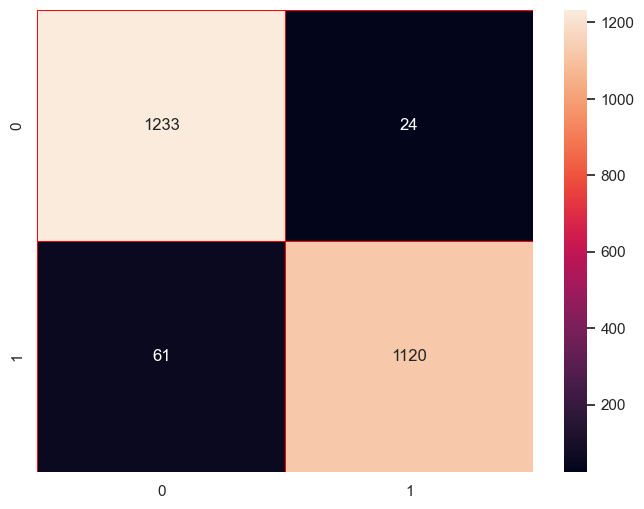

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, s_predict)
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax,cmap='rocket')

plt.show()

In [24]:
# Random Forest
r = RandomForestClassifier(max_leaf_nodes=4,oob_score=True,random_state=88)
r.fit(X_train,y_train)
r_predict = r.predict(X_test)
#report the results
print("Accuracy Score:", metrics.accuracy_score(y_test,r_predict))
print("F1-score", f1_score(y_test, r_predict))

Accuracy Score: 0.9848236259228876
F1-score 0.9840860215053764


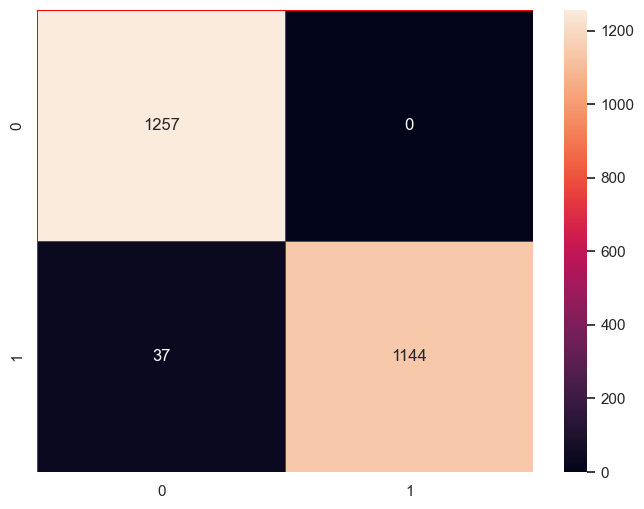

In [25]:
cm = confusion_matrix(y_test, r_predict)
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax,cmap='rocket')

plt.show()